# Step 1: Importing the required modules
### We will import the following modules:

- CV2: Imported to use OpenCV for image processing
- easygui: Imported to open a file box. It allows us to select any file from our system.
- Numpy: Images are stored and processed as numbers. These are taken as arrays. We use NumPy to deal with arrays.
- Imageio: Used to read the file which is chosen by file box using a path.
- Matplotlib: This library is used for visualization and plotting.  Thus, it is imported to form the plot of images.
- OS: For OS interaction. Here, to read the path and save images to that path.

In [1]:
import cv2
import easygui
import numpy as np
import imageio
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk,Image
import matplotlib
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using :0.0')
    os.environ.__setitem__('DISPLAY', ':0.0')
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

no display found. Using :0.0


# Step 2: Building a File Box to choose a particular file
In this step, we will build the main window of our application, where the buttons, labels, and images will reside. We also give it a title by title() function.

In [2]:
"""file open box opens the box to choose file and help use to store file path as string"""
def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

### Explanation:

The above code opens the file box, i.e the pop-up box to choose the file from the device, which opens every time you run the code. fileopenbox() is the method in easyGUI module which returns the path of the chosen file as a string.

NOTE: Now, all the operation will be done on the button click, thus all the below steps are the part of function cartoonify (ImagePath)

# Step 3: How is an image stored?
Now, just think, how will a program read an image? For a computer, everything is just numbers. Thus, in the below code, we will convert our image into a numpy array.

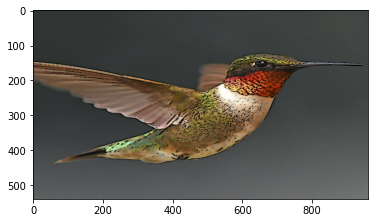

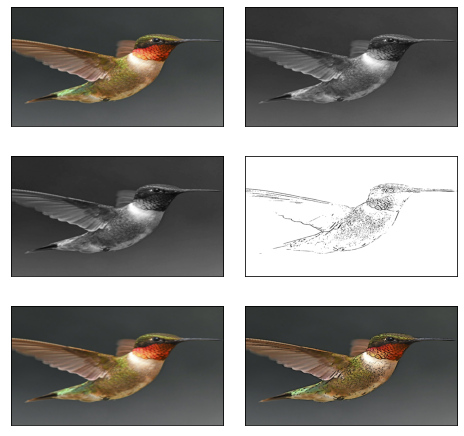

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-3-c8c56e0a250b>", line 56, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
  File "<ipython-input-3-c8c56e0a250b>", line 71, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [3]:
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(originalmage)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
#     plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
#     plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
#     plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
#     plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
#     plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()
    
    
    
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()





### Explanation:
Imread is a method in cv2 which is used to store images in the form of numbers. This helps us to perform operations according to our needs.The image is read as a numpy array, in which cell values depict R(red),G(green) and B(blue) channel values of pixel
NOTE: We resize the image after each transformation to display all images on similar scale at last

# Beginning with image transformations:
To convert an Image to a cartoon, multiple tranformation are done.
Firstly, an image is converted to a Grayscale image. Yes similar to the old day's picture.! Then, the Grayscale image is smoothened, and we try to extract the edge in the image. finally, we form a color image and mask it with edges. This create a beautiful cartoon image with edges and lightened color of the original image.

- Let's start with transformations to convert an image to its cartoon image

# Step 4: Transforming an image to grayscale

### Explanation:
cvtColor(image,flag) is a method in cv2 which is used to transformation an image into the color-space mentioned as 'flag'. Here,our first step is to convert the image into grayscale. A grayscale image is stored as grayScaleImage.
After each transformation, we resize the resultant image using the resize() method in cv2 and display it using imshow() method.This is done to get more clear insights into every single transformations step.

# Step 5: Smoothening a grayscale image

### Explanation:
To smoothen an Image, we simply apply a blur effect.This is done using medianBlur() function. Here, the center pixel is assigned a mean value of all the pixels which fall under the kernal.In turn creating a blur effect.

# Step 6: Retrieving the edges of an image

### Explanation:
Cartoon effect has two specialties:
- Highlighted Edges
- Smooth colors

In this step, we will work on first specialty.Here, we will try to retrieve the edges and highlight them. This is attainted by the **adaptive thresholding technique**.The threshold value is the mean of the neighbourhood pixel values area minus the constant C. C is a constant that is substracted from the mean or weighted sum of the neighborhood pixels.
**Thresh_binary** is the type of threshold applied, and the remaining parameters determine the block size

# Step 7: Preparing a Mask Image

### Explanation:
In the above code, we finally work on the second specialty. we prepare a lightened color image that we mask with edges at the end to produce a cartoon image. We use bilateralFilter which remove the noise. It can be taken as smoothening of an image to an extent.
The **third parameter** is the diameter of the pixel neighbourhood,i.e,the number of pixel around a certain pixel which will determine its value.**The fourth and fifth parameter** define sigmaColor and SigmaSpace.These parameter are used to give a sigma effect,i.e make an image look vicious and water paint,removing the roughness in colors.
- Yes, it’s similar to BEAUTIFY or AI effect in cameras of modern mobile phones.

# Step 8: Giving a Cartoon Effect

### Explanation:
So,Let's combine the two specialties.This will be done using MASKING.We perform bitwise and on two images to mask them.Remember,Images are just numbers?

# Step 9: Plotting all the transitions together
### Explanation:

To plot all the images, we first make a list of all the images. The list here is named “images” and contains all the resized images. Now, we create axes like subl=plots in a plot and display one-one images in each block on the axis using imshow() method.

plt.show() plots the whole plot at once after we plot on each subplot.

# Step 10: Functionally of save button

### Explanation:

Here, the idea is to save the resultant image. For this, we take the old path, and just change the tail (name of the old file) to a new name and store the cartoonified image with a new name in the same folder by appending the new name to the head part of the file.

For this, we extract the head part of the file path by os.path.dirname() method. Similarly, os.path.splitext(ImagePath)[1] is used to extract the extension of the file from the path.

Here, newName stores “Cartoonified_Image” as the name of a new file. os.path.join(path1, newName + extension) joins the head of path to the newname and extension. This forms the complete path for the new file.

imwrite() method of cv2 is used to save the file at the path mentioned. cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR) is used to assure that no color get extracted or highlighted while we save our image. Thus, at last, the user is given confirmation that the image is saved with the name and path of the file.